# Fine-tuning Using GPT 3.5 Turbo

## Intro

I created a smaller version of the actual dataset with only 26 data
points. All 26 movements included are quite short.

- `data/interim/final_dataset_small_26.json`

The number of total tokens in JSON file: 178981. Using three epochs, the
total cost must be $4.30 USD.

> The actual cost has been $2.56 USD.

## Creating the training and test sets

In [9]:
import json

def count_training_samples(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        return len(data)

file_path = '../data/interim/final_dataset_small_26.json'
print(f'The number of training samples in the file is: {count_training_samples(file_path)}')


The number of training samples in the file is: 26


In [1]:
import json
import os
from sklearn.model_selection import train_test_split

def split_dataset(input_file_path: str, train_file_path: str, test_file_path: str, test_size: float = 0.3, random_state: int = 42):
    """
    Split a JSON dataset into training and test sets, and write them to separate files.

    Parameters
    ----------
    input_file_path : str
        Path to the input JSON file containing the dataset to be split.
    train_file_path : str
        Path to the output JSON file where the training set will be written.
    test_file_path : str
        Path to the output JSON file where the test set will be written.
    test_size : float, optional
        Proportion of the dataset to include in the test split, by default 0.3.
    random_state : int, optional
        Controls the shuffling applied to the data before applying the split, by default 42.

    Raises
    ------
    FileNotFoundError
        If the input file does not exist.
    TypeError
        If the data in the JSON file is not a list of objects.

    Returns
    -------
    None
    """
    # Ensure the input file exists
    if not os.path.exists(input_file_path):
        raise FileNotFoundError(f"The input file at {input_file_path} does not exist.")

    # Load the data from the JSON file
    with open(input_file_path, 'r') as infile:
        data = json.load(infile)

    # Ensure the data is a list
    if not isinstance(data, list):
        raise TypeError("The data in the JSON file should be a list of objects.")

    # Split the data into training and test sets
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)

    # Write the training data to a JSON file
    with open(train_file_path, 'w') as train_file:
        json.dump(train_data, train_file, indent=4)

    # Write the test data to a JSON file
    with open(test_file_path, 'w') as test_file:
        json.dump(test_data, test_file, indent=4)

    print(f"Data has been split and written to {train_file_path} and {test_file_path}")

In [10]:
# Example usage:
input_file_path = '../data/interim/final_dataset_small_26.json'
train_file_path = '../data/processed/train_dataset.json'
test_file_path = '../data/processed/test_dataset.json'

split_dataset(input_file_path, train_file_path, test_file_path)


Data has been split and written to ../data/processed/train_dataset.json and ../data/processed/test_dataset.json


Let's count the number of data points in the training dataset:

In [11]:
def count_training_samples(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        return len(data)

file_path = '../data/processed/train_dataset.json'
print(f'The number of training samples in the file is: {count_training_samples(file_path)}')

The number of training samples in the file is: 18


Let's count the number of data points in the test dataset:

In [12]:
def count_training_samples(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        return len(data)

file_path = '../data/processed/test_dataset.json'
print(f'The number of training samples in the file is: {count_training_samples(file_path)}')

The number of training samples in the file is: 8


In [13]:
18 + 8

26

In [15]:
import os
import openai
from dotenv import load_dotenv

In [16]:
load_dotenv()

openai.api_key = os.environ["OPENAI_API_KEY"]

OpenAI API expects the file to be in JSONL (JSON Lines) format, where
each line in the file is a valid JSON object (dictionary). However, the
file you are trying to upload (`train_dataset.json`) does not adhere to
this format. The error message hints that the first line of your file
starts with a "[" (opening bracket of a JSON array), which is not
allowed in JSONL format.

Solution: You need to convert your JSON file to JSONL format. Below is a
general approach to convert a JSON file to JSONL:

Read the JSON file and load the data.  Write each JSON object in the
data to a new line in a JSONL file.  Here’s a Python script that
demonstrates this process:

In [18]:
import json

# Step 1: Read JSON file and load the data
with open("../data/processed/train_dataset.json", 'r') as json_file:
    data = json.load(json_file)

# Step 2: Write each JSON object to a new line in a JSONL file
with open("../data/processed/train_dataset.jsonl", 'w') as jsonl_file:
    for item in data:
        jsonl_file.write(json.dumps(item))
        jsonl_file.write('\n')

In [19]:
import json

# Step 1: Read JSON file and load the data
with open("../data/processed/test_dataset.json", 'r') as json_file:
    data = json.load(json_file)

# Step 2: Write each JSON object to a new line in a JSONL file
with open("../data/processed/test_dataset.jsonl", 'w') as jsonl_file:
    for item in data:
        jsonl_file.write(json.dumps(item))
        jsonl_file.write('\n')

Upload our training and evaluation files, in chat completion format:

In [20]:
openai.File.create(
    file=open("../data/processed/train_dataset.jsonl", "rb"),
    purpose="fine-tune",
)

<File file id=file-rQH5EIMDnEtCCnK8EQP0L8E3 at 0x11736e070> JSON: {
  "object": "file",
  "id": "file-rQH5EIMDnEtCCnK8EQP0L8E3",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 177744,
  "created_at": 1696296774,
  "status": "uploaded",
  "status_details": null
}

In [21]:
openai.File.create(
    file=open("../data/processed/test_dataset.jsonl", "rb"),
    purpose="fine-tune",
)

<File file id=file-c9x5QPEBp7qH63emV9osTSJw at 0x16e6fad90> JSON: {
  "object": "file",
  "id": "file-c9x5QPEBp7qH63emV9osTSJw",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 86439,
  "created_at": 1696296842,
  "status": "uploaded",
  "status_details": null
}

check the status of these files by copying in the returned ID's above.
If there are JSON errors they will be reported here.

In [22]:
openai.File.retrieve("file-rQH5EIMDnEtCCnK8EQP0L8E3")

<File file id=file-rQH5EIMDnEtCCnK8EQP0L8E3 at 0x16e4508b0> JSON: {
  "object": "file",
  "id": "file-rQH5EIMDnEtCCnK8EQP0L8E3",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 177744,
  "created_at": 1696296774,
  "status": "processed",
  "status_details": null
}

In [23]:
openai.File.retrieve("file-c9x5QPEBp7qH63emV9osTSJw")

<File file id=file-c9x5QPEBp7qH63emV9osTSJw at 0x16eb73c90> JSON: {
  "object": "file",
  "id": "file-c9x5QPEBp7qH63emV9osTSJw",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 86439,
  "created_at": 1696296842,
  "status": "processed",
  "status_details": null
}

Start out fine tuning job! Copy in the ID's for our uploaded training
and validation files.

In [25]:
openai.FineTuningJob.create(
    training_file="file-rQH5EIMDnEtCCnK8EQP0L8E3",
    validation_file="file-c9x5QPEBp7qH63emV9osTSJw",
    model="gpt-3.5-turbo",
)

<FineTuningJob fine_tuning.job id=ftjob-iF4OaSjzucNJRXshDmb0YYv9 at 0x16eb632e0> JSON: {
  "object": "fine_tuning.job",
  "id": "ftjob-iF4OaSjzucNJRXshDmb0YYv9",
  "model": "gpt-3.5-turbo-0613",
  "created_at": 1696297327,
  "finished_at": null,
  "fine_tuned_model": null,
  "organization_id": "org-e65yKoVCQyCbjVZoGsVdo8mQ",
  "result_files": [],
  "status": "validating_files",
  "validation_file": "file-c9x5QPEBp7qH63emV9osTSJw",
  "training_file": "file-rQH5EIMDnEtCCnK8EQP0L8E3",
  "hyperparameters": {
    "n_epochs": "auto"
  },
  "trained_tokens": null,
  "error": null
}

Get general info about this job

In [26]:
openai.FineTuningJob.retrieve("ftjob-iF4OaSjzucNJRXshDmb0YYv9")

<FineTuningJob fine_tuning.job id=ftjob-iF4OaSjzucNJRXshDmb0YYv9 at 0x16eb7d0d0> JSON: {
  "object": "fine_tuning.job",
  "id": "ftjob-iF4OaSjzucNJRXshDmb0YYv9",
  "model": "gpt-3.5-turbo-0613",
  "created_at": 1696297327,
  "finished_at": null,
  "fine_tuned_model": null,
  "organization_id": "org-e65yKoVCQyCbjVZoGsVdo8mQ",
  "result_files": [],
  "status": "running",
  "validation_file": "file-c9x5QPEBp7qH63emV9osTSJw",
  "training_file": "file-rQH5EIMDnEtCCnK8EQP0L8E3",
  "hyperparameters": {
    "n_epochs": 5
  },
  "trained_tokens": null,
  "error": null
}

Monitor its progress. When done, you can use the resulting fine tuned
model ID in the playground (or the API).

In [32]:
openai.FineTuningJob.list_events(id="ftjob-iF4OaSjzucNJRXshDmb0YYv9", limit=10)

<OpenAIObject list at 0x176095530> JSON: {
  "object": "list",
  "data": [
    {
      "object": "fine_tuning.job.event",
      "id": "ftevent-VthSo2qISWHEo4FBETxiNUD1",
      "created_at": 1696297699,
      "level": "info",
      "message": "The job has successfully completed",
      "data": {},
      "type": "message"
    },
    {
      "object": "fine_tuning.job.event",
      "id": "ftevent-HnTyFSyAS5rRHqzRqvMd6tEq",
      "created_at": 1696297697,
      "level": "info",
      "message": "New fine-tuned model created: ft:gpt-3.5-turbo-0613:personal::85OoCQC6",
      "data": {},
      "type": "message"
    },
    {
      "object": "fine_tuning.job.event",
      "id": "ftevent-hlSg00pSJqS6vNYIcLfzsmh0",
      "created_at": 1696297691,
      "level": "info",
      "message": "Step 90/90: training loss=0.30, validation loss=0.62",
      "data": {
        "step": 90,
        "train_loss": 0.29875946044921875,
        "valid_loss": 0.6187019972043617,
        "train_mean_token_accuracy": 

For comparison, see how the non-fine-tuned GPT model does:

In [33]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {
            "role": "system",
            "content": "You are a music AI that generates melodies in the ABC format.",
        },
        {"role": "user", "content": "Generate a short melody for me."},
        {
            "role": "assistant",
            "content": "ABC notation: X: 1 $ T: from data/interim/ps38_01_C_Major.mid $ M: 4/4 $ L: 1/8 $ Q:1/4=135 $ K:C % 0 sharps $ V:1 $ %%MIDI program 0 $ %%MIDI program 0 $ %%MIDI program 0 $ C4 [ED]/2z/2C DE|  C2 cG GE EC|  F4 [FE]/2z/2D EF|  D2 GA GE FD| $ C4 [ED]/2z/2C DE|  F4 [BA]/2z/2G AB|  cG AF EG FD|  D4 C2 z2| $ D4 FE DE|  GF dc BA GF|  E4 GF EF|  AG ed cB AG| $ F2 dc BA GF|  E2 cB AG FE|  D2 G,A, B,C DE|  F2 EF GF DE| $ C4 [ED]/2z/2C DE|  C2 cG GE EC|  F4 [FE]/2z/2D EF|  D2 GA GE FD| $ C4 [ED]/2z/2C DE|  F4 [BA]/2z/2G AB|  cG AF EG FD|  D4 C2 z2| $ D4 FE DE|  GF dc BA GF|  E4 GF EF|  AG ed cB AG| $ F2 dc BA GF|  E2 cB AG FE|  D2 G,A, B,C DE|  F2 EF GF DE| $ C4 [ED]/2z/2C DE|  C2 cG GE EC|  F4 [FE]/2z/2D EF|  D2 GA GE FD| $ C4 [ED]/2z/2C DE|  F4 [BA]/2z/2G AB|  cG AF EG FD|  D4 C2 z2| $ G4 G2 G2|  G4 c2 e2|  g4 g2 g2|  e4 z4| $ G4 G2 G2|  G4 c2 e2|  g2 z2 B2 z2|  c2 z2 [CE,]2 [CE,]2| $ [CE,]4 [CE,]4|  [CE,]8|  z8|  zC/2 $ V:2 $ %%MIDI program 0 $ %%MIDI program 0 $ %%MIDI program 0 $ [E,C,]4 [F,B,,]4|  [E,C,]2 z6|  [D,G,,]4 [C,G,,]4|  [B,,G,,]2 z6| $ C,G, E,G, C,^A, G,A,|  C,A, F,A, C,F, D,F,|  E,2 F,2 G,2 G,,2|  C,2 G,,2 C,,2 z2| $ B,,G,, B,,G,, C,G,, C,G,,|  D,2 z6|  C,G,, C,G,, D,G,, D,G,,|  E,2 z6| $ [D,G,,]2 z4 [B,,G,,]2|  [C,G,,]2 z4 [A,,G,,]2|  [B,,G,,]2 z6|  z8| $ [E,C,]4 [F,B,,]4|  [E,C,]2 z6|  [D,G,,]4 [C,G,,]4|  [B,,G,,]2 z6| $ C,G, E,G, C,^A, G,A,|  C,A, F,A, C,F, D,F,|  E,2 F,2 G,2 G,,2|  C,2 G,,2 C,,2 z2| $ B,,G,, B,,G,, C,G,, C,G,,|  D,2 z6|  C,G,, C,G,, D,G,, D,G,,|  E,2 z6| $ [D,G,,]2 z4 [B,,G,,]2|  [C,G,,]2 z4 [A,,G,,]2|  [B,,G,,]2 z6|  z8| $ [E,C,]4 [F,B,,]4|  [E,C,]2 z6|  [D,G,,]4 [C,G,,]4|  [B,,G,,]2 z6| $ C,G, E,G, C,^A, G,A,|  C,A, F,A, C,F, D,F,|  E,2 F,2 G,2 G,,2|  C,2 G,,2 C,,2 z2| $ G,,D, F,D, G,,D, F,D,|  G,,C, E,C, G,,C, E,C,|  G,,B,, D,B,, G,,B,, D,B,,|  G,,C, E,C, G,,C, E,C,| $ G,,D, F,D, G,,D, F,D,|  G,,C, E,C, G,,C, E,C,|  G,,B,, D,B,, G,,D, F,D,|  [E,C,]2 z2 C,,2 C,,2| $ C,,2 C,2 G,,2 E,,2|  C,,8| $ ",
        },
    ],
)

print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Here is a short melody in the ABC format:\n\nX: 1\nT: Short Melody\nM: 4/4\nL: 1/8\nK: C\nC4 [ED]/2z/2C DE| \nC2 cG GE EC| \nF4 [FE]/2z/2D EF| \nD2 GA GE FD| \nC4 [ED]/2z/2C DE| \nF4 [BA]/2z/2G AB| \ncG AF EG FD| \nD4 C2 z2| \n\nD4 FE DE| \nGF dc BA GF| \nE4 GF EF| \nAG ed cB AG| \nF2 dc BA GF| \nE2 cB AG FE| \nD2 G,A, B,C DE| \nF2 EF GF DE| \n\nC4 [ED]/2z/2C DE| \nC2 cG GE EC| \nF4 [FE]/2z/2D EF| \nD2 GA GE FD| \nC4 [ED]/2z/2C DE| \nF4 [BA]/2z/2G AB| \ncG AF EG FD| \nD4 C2 z2| \n\nG4 G2 G2| \nG4 c2 e2| \ng4 g2 g2| \ne4 z4| \nG4 G2 G2| \nG4 c2 e2| \ng2 z2 B2 z2| \nc2 z2 [CE,]2 [CE,]2| \n\n[CE,]4 [CE,]4| \n[CE,]8| \nz8| \nzC/2|\n\nYou can listen to this melody by using software or online tools that support ABC notation."
}


When it's done, try our fine-tuned model! Copy in our fine tuned ID.

In [34]:
completion = openai.ChatCompletion.create(
    model="ft:gpt-3.5-turbo-0613:personal::85OoCQC6",
    messages=[
        {
            "role": "system",
            "content": "You are a music AI that generates melodies in the ABC format.",
        },
        {"role": "user", "content": "Generate a short melody for me."},
        {
            "role": "assistant",
            "content": "ABC notation: X: 1 $ T: from data/interim/ps38_01_C_Major.mid $ M: 4/4 $ L: 1/8 $ Q:1/4=135 $ K:C % 0 sharps $ V:1 $ %%MIDI program 0 $ %%MIDI program 0 $ %%MIDI program 0 $ C4 [ED]/2z/2C DE|  C2 cG GE EC|  F4 [FE]/2z/2D EF|  D2 GA GE FD| $ C4 [ED]/2z/2C DE|  F4 [BA]/2z/2G AB|  cG AF EG FD|  D4 C2 z2| $ D4 FE DE|  GF dc BA GF|  E4 GF EF|  AG ed cB AG| $ F2 dc BA GF|  E2 cB AG FE|  D2 G,A, B,C DE|  F2 EF GF DE| $ C4 [ED]/2z/2C DE|  C2 cG GE EC|  F4 [FE]/2z/2D EF|  D2 GA GE FD| $ C4 [ED]/2z/2C DE|  F4 [BA]/2z/2G AB|  cG AF EG FD|  D4 C2 z2| $ D4 FE DE|  GF dc BA GF|  E4 GF EF|  AG ed cB AG| $ F2 dc BA GF|  E2 cB AG FE|  D2 G,A, B,C DE|  F2 EF GF DE| $ C4 [ED]/2z/2C DE|  C2 cG GE EC|  F4 [FE]/2z/2D EF|  D2 GA GE FD| $ C4 [ED]/2z/2C DE|  F4 [BA]/2z/2G AB|  cG AF EG FD|  D4 C2 z2| $ G4 G2 G2|  G4 c2 e2|  g4 g2 g2|  e4 z4| $ G4 G2 G2|  G4 c2 e2|  g2 z2 B2 z2|  c2 z2 [CE,]2 [CE,]2| $ [CE,]4 [CE,]4|  [CE,]8|  z8|  zC/2 $ V:2 $ %%MIDI program 0 $ %%MIDI program 0 $ %%MIDI program 0 $ [E,C,]4 [F,B,,]4|  [E,C,]2 z6|  [D,G,,]4 [C,G,,]4|  [B,,G,,]2 z6| $ C,G, E,G, C,^A, G,A,|  C,A, F,A, C,F, D,F,|  E,2 F,2 G,2 G,,2|  C,2 G,,2 C,,2 z2| $ B,,G,, B,,G,, C,G,, C,G,,|  D,2 z6|  C,G,, C,G,, D,G,, D,G,,|  E,2 z6| $ [D,G,,]2 z4 [B,,G,,]2|  [C,G,,]2 z4 [A,,G,,]2|  [B,,G,,]2 z6|  z8| $ [E,C,]4 [F,B,,]4|  [E,C,]2 z6|  [D,G,,]4 [C,G,,]4|  [B,,G,,]2 z6| $ C,G, E,G, C,^A, G,A,|  C,A, F,A, C,F, D,F,|  E,2 F,2 G,2 G,,2|  C,2 G,,2 C,,2 z2| $ B,,G,, B,,G,, C,G,, C,G,,|  D,2 z6|  C,G,, C,G,, D,G,, D,G,,|  E,2 z6| $ [D,G,,]2 z4 [B,,G,,]2|  [C,G,,]2 z4 [A,,G,,]2|  [B,,G,,]2 z6|  z8| $ [E,C,]4 [F,B,,]4|  [E,C,]2 z6|  [D,G,,]4 [C,G,,]4|  [B,,G,,]2 z6| $ C,G, E,G, C,^A, G,A,|  C,A, F,A, C,F, D,F,|  E,2 F,2 G,2 G,,2|  C,2 G,,2 C,,2 z2| $ G,,D, F,D, G,,D, F,D,|  G,,C, E,C, G,,C, E,C,|  G,,B,, D,B,, G,,B,, D,B,,|  G,,C, E,C, G,,C, E,C,| $ G,,D, F,D, G,,D, F,D,|  G,,C, E,C, G,,C, E,C,|  G,,B,, D,B,, G,,D, F,D,|  [E,C,]2 z2 C,,2 C,,2| $ C,,2 C,2 G,,2 E,,2|  C,,8| $ ",
        },
    ],
)

print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "ABC notation: X: 1 $ T: from data/interim/ps38_18_F_major.mid $ M: 4/4 $ L: 1/8 $ Q:1/4=135 $ K:F % 1 flat $ V:1 $ %%MIDI program 0 $ %%MIDI program 0 $ %%MIDI program 0 $ F5/2F/2 GFE=F|  F2 z4 ABBc|  dedc ABB^A|  G2 z4 F5/2F/2| $ GFEF F4 z4|  G4 F4 GBdc|  BcBA GFE^D|  C2 z4 $\\part{2}$ [^Ff]8| $ [d_D]8|  [c_C]8|  [B,B,]8|  [c_C]5/2[c2C]/2 [B,B,]5/2[B,2B,]/2| $ [A,A,]5/2[A,2A,]/2 [G,G,]5/2[G,2G,]/2|  [A,3A,]/2E/2 [G,-E,]5/2[G,-E,]2|  [F,-D,]3/2D/2 [F,-D,]3/2F,/2[FD,]/2|  [E,2E,]4 [F,2F,]4| $ [G,2G,]4 [A,2A,]8|  [B,2B,]4 [c2c]2zB|  AGFE DCBD C=B,A,|  B,C/2D/2C/2B,/2 C2 z2 [FA,]/2| $ [FA,]4 [F^D,]4|  [F^D,]6/2[F,=D,]/2 [F,G,]4|  [FA,]5/2[F2A,]/2 [F^D,]5/2[F2D]/2|  [GC]5/2[G,2C,]/2 [GC]5/2[G,2C,]/2| $ zD G,F, D,G, [AG,F,][CG,]|  zD G,F, D,G, [AG,F,][CG,]|  zD G,F, D,G, [AG,F,][CG,]|  zD G,F, D,G, [AG,F,][CG,]| $ zD G,F, D,G, [AG,F,][CG,]|  zD =fF dF =fd|  fc dF ^CA, DF|  ^G,^A, G,F, ^CA, ^A,F,A,| $ ^G,F,D, G,^A, F,D^G, A,F,|  =fF dF ed ^cB|  c=B >[B,

Let's save the output as an ABC format music file:

In [35]:
import os
import json

def write_abc_file(completion_message: dict, filename: str) -> None:
    """
    Write ABC notation to a file.

    Parameters:
    completion_message (dict): The completion message containing ABC notation as a string.
    filename (str): The name of the file to write to.

    Returns:
    None: Writes the ABC notation to a file.
    """
    # Extract and process the ABC notation string to format it correctly
    abc_notation = completion_message['content']
    formatted_abc = abc_notation.replace('$', '\n').replace('\\end{ABC}', '').strip()

    # Set the path to save the file
    output_path = os.path.join('..', 'data', 'processed', f"{filename}.abc")

    # Write the formatted ABC notation to a file
    with open(output_path, 'w') as file:
        file.write(formatted_abc)

In [39]:
# Example usage:
example_message = completion.choices[
    0
].message  # assuming completion.choices[0].message contains the relevant dictionary
write_abc_file(
    example_message, "tuned_model_example_00"
)  # This will create a file at ../data/processed/example_filename.abc

From ABC format file to MIDI file. The `music21` library can also
convert ABC to MIDI. First, you need to install the library:

In [41]:
from music21 import *


def abc_to_midi(abc_file_path, midi_file_path):
    # Parse ABC file
    abc_score = converter.parse(abc_file_path, format="abc")

    # Write to MIDI
    mf = midi.translate.music21ObjectToMidiFile(abc_score)
    mf.open(midi_file_path, "wb")
    mf.write()
    mf.close()


# Usage example:
abc_to_midi(
    "../data/processed/tuned_model_example_00.abc",
    "../data/processed/tuned_model_example_00.mid",
)

ABCHandlerException: no active default note length provided for note processing. tPrev: None, token: <music21.abcFormat.ABCNote 'A'>, tNext: <music21.abcFormat.ABCNote 'B'>

## References

- [Creating Data from Star Trek with OpenAI's new Fine-Tuning API for GPT 3.5!](https://youtu.be/NjQP7jRqkBU?si=xx7dc_-DoH9hTdJ5)

## Create a music sheet from an ABC format using MuseScore

Certainly! Below are the summarized steps to create a music sheet from
an ABC file using MuseScore:

### 1. **Install MuseScore:**
   - Download and install MuseScore from the [official
     website](https://musescore.org/).
   - Ensure it’s accessible from your system's path.

### 2. **Set MuseScore Path in music21:**
   - Find the path where MuseScore is installed.
   - Set this path in the music21 environment. You can do this
     programmatically using Python:

    ```python
    from music21 import environment
    env = environment.Environment()
    env['musicxmlPath'] = '/path/to/MuseScore'
    env['musescoreDirectPNGPath'] = '/path/to/MuseScore'
    ```

### 3. **Convert ABC to Music Sheet:**
   - Parse the ABC file using music21 and show or save the sheet music.

    ```python
    from music21 import converter
    
    # Parse ABC file
    abcScore = converter.parse('your_abc_file.abc', format='abc')
    
    # Show the score (this will open MuseScore with the parsed music)
    abcScore.show()
    ```

### 4. **Save as PDF or Other Formats (Optional):**
   - You can save the sheet music in various formats like PDF, PNG,
     etc., using MuseScore's GUI or programmatically.

### Notes:
   - Ensure you have the necessary Python libraries installed, such as
     `music21`.
   - The path to MuseScore might differ based on your operating system
     and installation method, so adjust it accordingly.
   - If you encounter issues, check the error messages for clues and
     ensure your ABC file is correctly formatted.

### Conclusion:
With these steps, you should be able to convert ABC notation files into
sheet music using the MuseScore software and the music21 Python library.
Adjust the paths and filenames as necessary to match your system and
files.

In [46]:
from music21 import *
from music21 import environment

In [51]:
from music21 import environment

# Set the path to MuseScore
env = environment.Environment()
env['musicxmlPath'] = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'
env['musescoreDirectPNGPath'] = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'


In [52]:
# Print the environment settings to verify the path
print(environment.Environment())

{'directoryScratch': None, 'lilypondPath': '/Applications/Lilypond.app/Contents/Resources/bin/lilypond', 'lilypondVersion': None, 'lilypondFormat': 'pdf', 'lilypondBackend': 'ps', 'musicxmlPath': '/Applications/MuseScore 4.app/Contents/MacOS/mscore', 'midiPath': '/Applications/GarageBand.app', 'graphicsPath': '/System/Applications/Preview.app', 'vectorPath': '/System/Applications/Preview.app', 'pdfPath': '/System/Applications/Preview.app', 'braillePath': None, 'musescoreDirectPNGPath': '/Applications/MuseScore 4.app/Contents/MacOS/mscore', 'showFormat': 'musicxml', 'writeFormat': 'musicxml', 'ipythonShowFormat': 'ipython.musicxml.png', 'autoDownload': 'ask', 'debug': 0, 'warnings': 1, 'localCorpusSettings': LocalCorpusSettings([]), 'localCorporaSettings': {}, 'manualCoreCorpusPath': None}


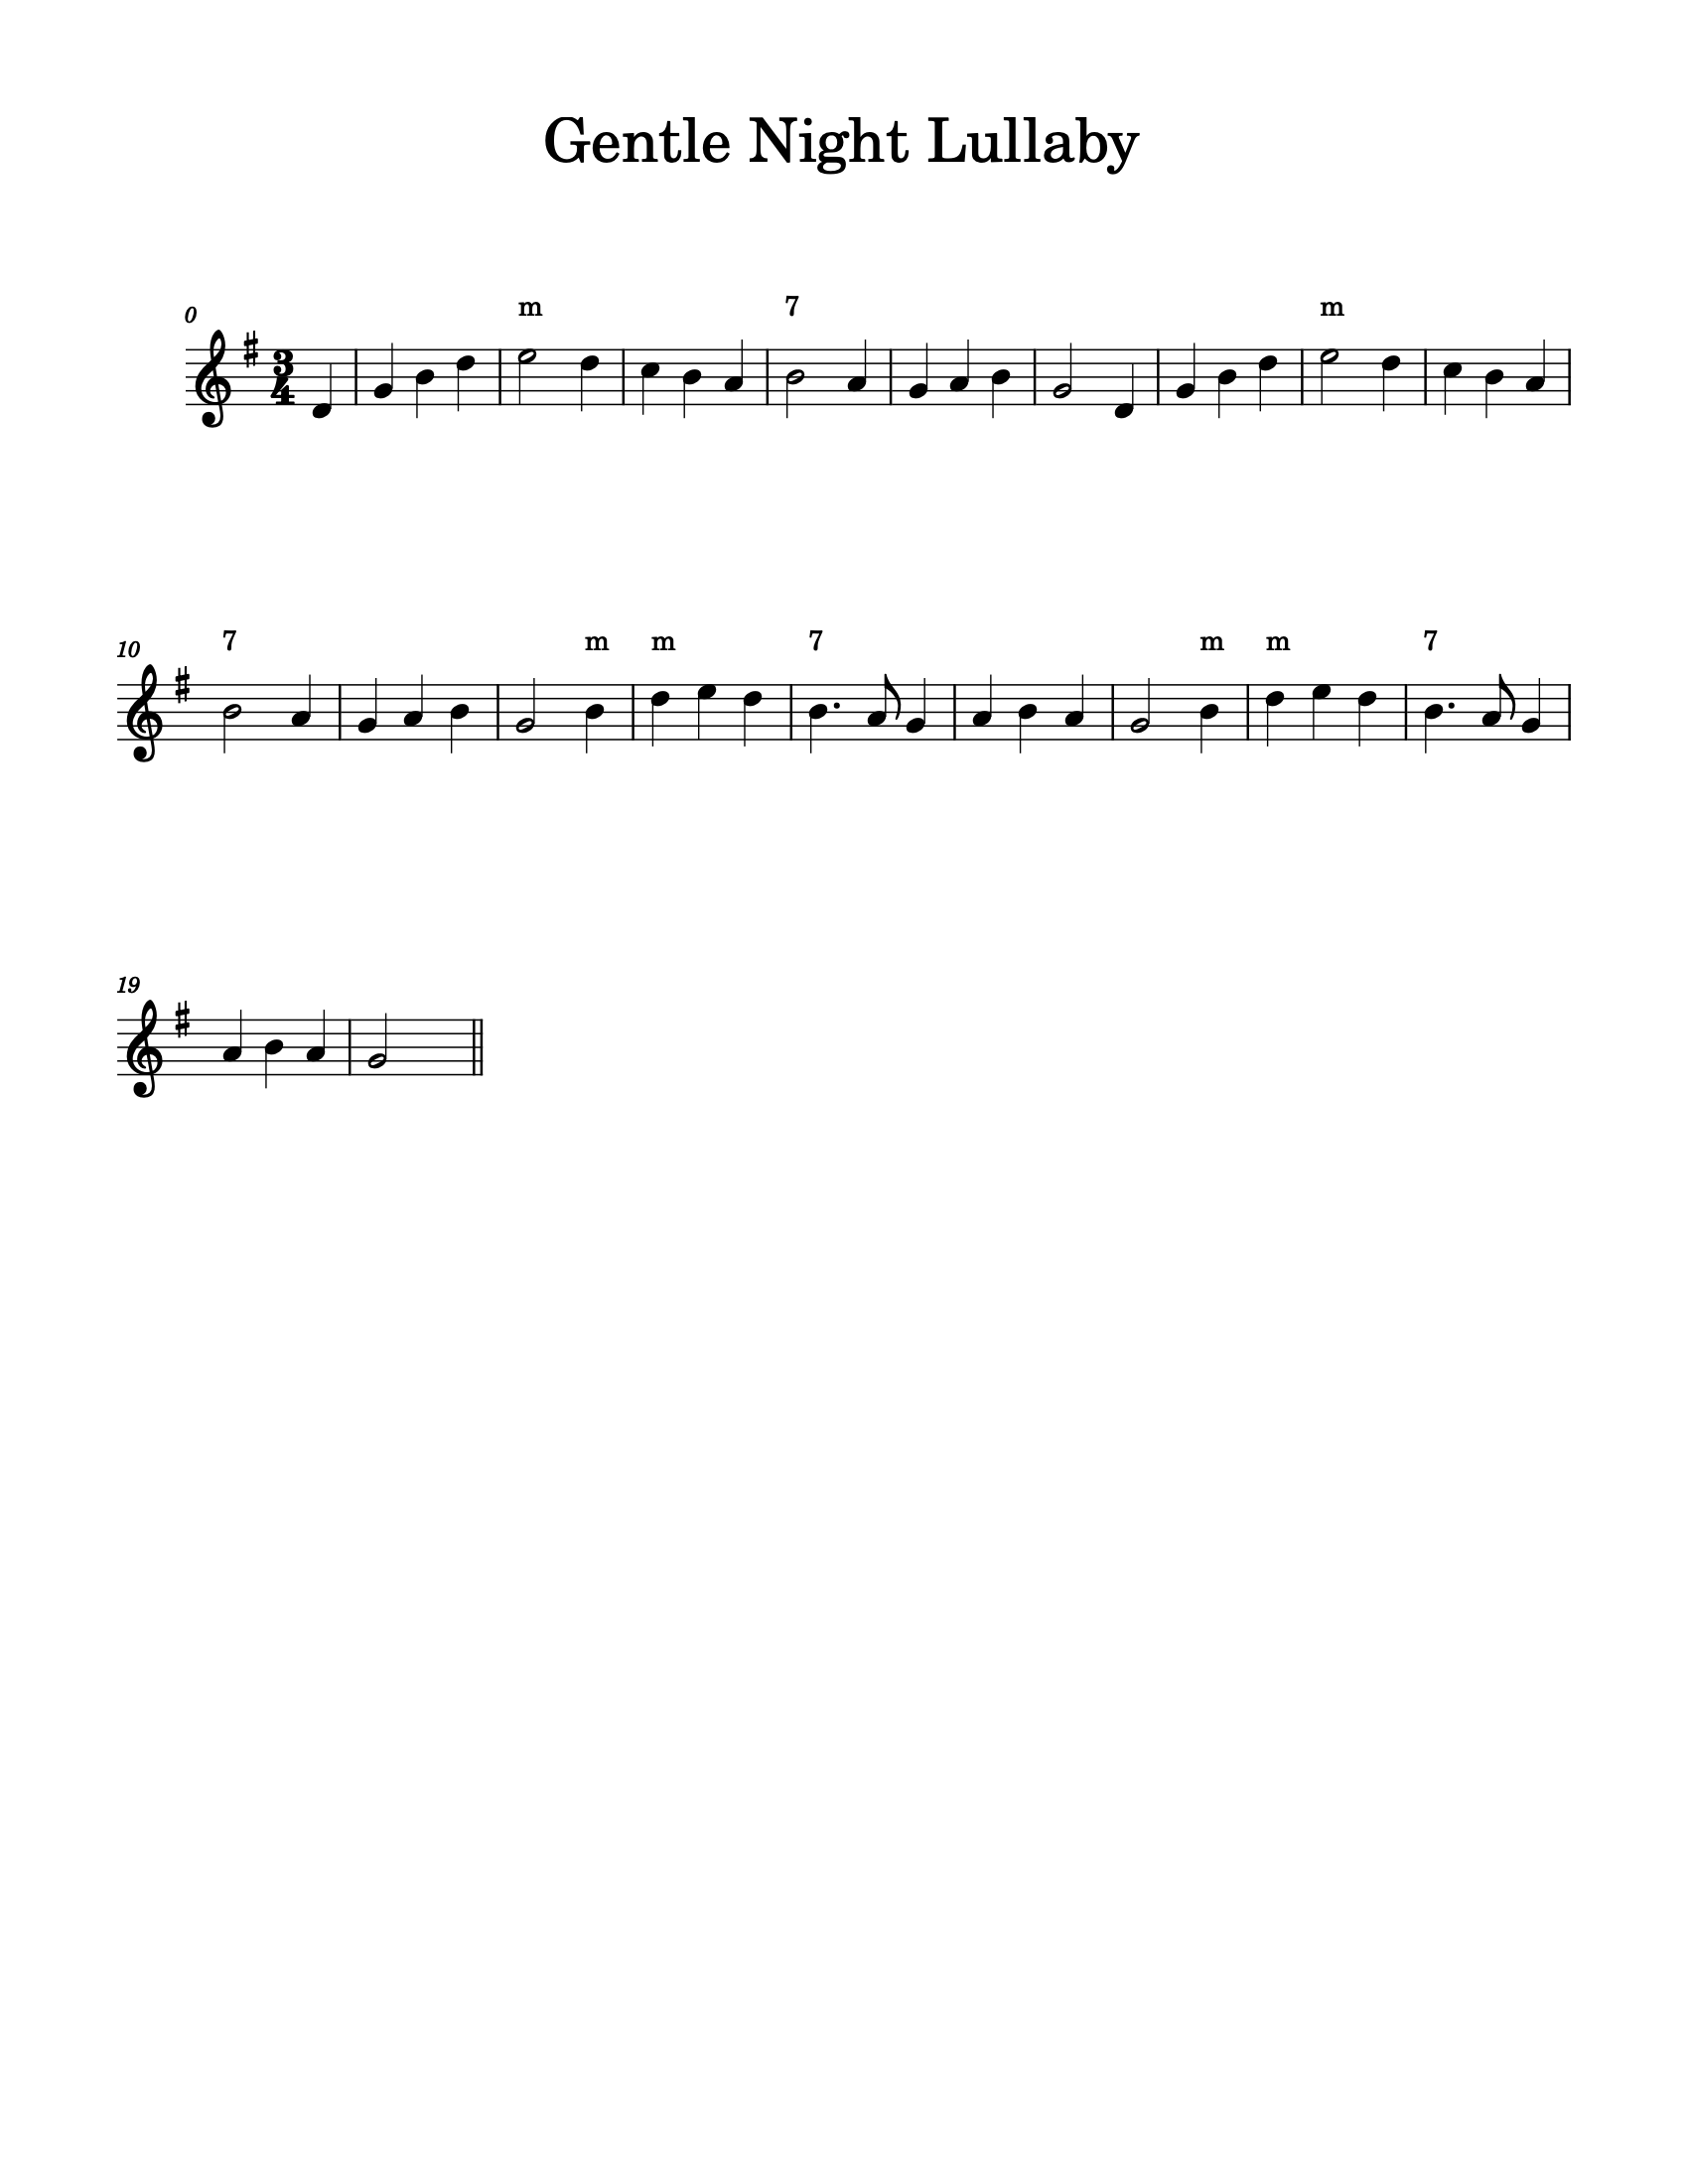

In [50]:
# Load ABC file
abcScore = converter.parse('../data/processed/gentle_night_lullaby.abc', format='abc')

# Show the score
abcScore.show()

In [62]:
import gradio as gr
from music21 import converter
import os
import subprocess

# Step 1: Convert ABC to MusicXML using Music21
def abc_to_musicxml(abc_notation, xml_file_path):
    abc_score = converter.parse(abc_notation, format='abc')
    abc_score.write('musicxml', xml_file_path)

# Step 2: Render MusicXML to PNG using MuseScore
def musicxml_to_png(xml_file_path, png_file_path, musescore_path):
    subprocess.run([musescore_path, "-o", png_file_path, xml_file_path])

# Step 3: Display PNG using Gradio
def show_sheet(abc_notation):
    xml_file_path = "temp_music_sheet.xml"
    png_file_path = "temp_music_sheet.png"
    
    # Convert ABC to MusicXML
    abc_to_musicxml(abc_notation, xml_file_path)
    
    # Convert MusicXML to PNG
    musescore_path = "/Applications/MuseScore 4.app/Contents/MacOS/mscore"
    musicxml_to_png(xml_file_path, png_file_path, musescore_path)
    
    # Return PNG for Gradio UI
    return png_file_path

# Define Gradio UI
iface = gr.Interface(
    fn=show_sheet,                      # Function to be called on user input
    inputs=gr.inputs.Textbox(lines=20), # Textbox for user to input ABC notation
    outputs="image",                    # Output is an image
    live=True                           # Update output on every change to input
)

# Launch Gradio UI
iface.launch()




/var/folders/v1/n9k_fx4s7sl6cwlq6swmjxcc0000gn/T/ipykernel_59506/2146393708.py:33: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=20), # Textbox for user to input ABC notation
/var/folders/v1/n9k_fx4s7sl6cwlq6swmjxcc0000gn/T/ipykernel_59506/2146393708.py:33: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=20), # Textbox for user to input ABC notation
/var/folders/v1/n9k_fx4s7sl6cwlq6swmjxcc0000gn/T/ipykernel_59506/2146393708.py:33: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=20), # Textbox for user to input ABC notation


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/markeyser/miniforge3/envs/genai-music-lab-env/lib/python3.10/site-packages/gradio/routes.py", line 508, in predict
    output = await route_utils.call_process_api(
  File "/Users/markeyser/miniforge3/envs/genai-music-lab-env/lib/python3.10/site-packages/gradio/route_utils.py", line 219, in call_process_api
    output = await app.get_blocks().process_api(
  File "/Users/markeyser/miniforge3/envs/genai-music-lab-env/lib/python3.10/site-packages/gradio/blocks.py", line 1440, in process_api
    data = self.postprocess_data(fn_index, result["prediction"], state)
  File "/Users/markeyser/miniforge3/envs/genai-music-lab-env/lib/python3.10/site-packages/gradio/blocks.py", line 1341, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "/Users/markeyser/miniforge3/envs/genai-music-lab-env/lib/python3.10/site-packages/gradio/components/image.py", line 318, in postprocess
    return client_utils.encode_url_or_file_

In [59]:
import gradio as gr
from music21 import converter
import os
import subprocess

# Step 1: Convert ABC to MusicXML using Music21
def abc_to_musicxml(abc_file_path, xml_file_path):
    abc_score = converter.parse(abc_file_path, format='abc')
    abc_score.write('musicxml', xml_file_path)

    
    # Convert ABC to MusicXML
    abc_file_path = '../data/processed/gentle_night_lullaby.abc'
    xml_file_path = '../data/processed/gentle_night_lullaby.xml'
    abc_to_musicxml(abc_file_path, xml_file_path)